In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline
import plotly.express as px

In [65]:
df1= pd.read_excel('/home/kala/anaconda3/envs/Intro_to_TimeSeries_Forecasting/prayagraj data/Prayagraj Data Processing Jul-2023 to Mar-2024_hourly_cal.xlsx')

In [66]:
df1['Timestamp'] = pd.to_datetime(df1.Timestamp ,errors='coerce')
df1 = df1.set_index('Timestamp')

In [67]:
df2=pd.read_csv('/home/kala/Downloads/Prayagraj-Data Processing & Analytics(Jan -Jun 2023) - Hourly Data.csv')

In [68]:
df2['Timestamp'] = pd.to_datetime(df2.Timestamp ,errors='coerce')
df2 = df2.set_index('Timestamp')

In [69]:
print(df1.shape[0],df2.shape[0],df1.shape[0]+df2.shape[0])

2578 4249 6827


In [70]:
common_df1 = ['Totalizer1','PPPPU 1 Motive Pressure',
       'PPPPU 1 Condensate Pressure', 'PPPPU 1 Overflow Temperature',
       'FJP Motive Steam Pressure', 'FJP Condensate Pressure',
       'FJP Flash Steam pressure', 'FJP Over Flow Temperature','Feed water Temp']

In [71]:
df1_null_no = df1.dropna(subset = common_df1)


In [72]:
df2_null_no = df2.dropna(subset = common_df1)


In [82]:
df = pd.concat([df2_null_no,df1_null_no],axis = 0)

In [83]:
df.shape

(5742, 44)

In [84]:
df

,Totalizer1,Direct Steam,Indirect Steam,Condensate Total,Direct(%),Indirect(%),Gap In Indirect Vs CRF,CRF,Pump1 Total,Pump2 Total,...,FJP Condensate Pressure,FJP Flash Steam pressure,FJP Over Flow Temperature,HRU INLET Temperature,HRU OUTLET Temperature,PRS Inlet Pressure,Steam Header Pressure,Gap,Flash Motive Pressure,Flash Steam Pressure
Timestamp,,,,,,,,,,,,,,,,,,,,,
2023-01-02 09:00:00.000,35,NaN,NaN,330,NaN,NaN,NaN,NaN,300,0,...,6.40,6.40,1600.00,65.66,91.45,1600.00,1600.0,NaN,NaN,NaN
2023-01-02 10:00:00.000,815,NaN,NaN,"2,490",NaN,NaN,NaN,NaN,"2,250",150,...,6.40,6.40,1600.00,70.86,97.02,1600.00,1600.0,NaN,NaN,NaN
2023-01-02 11:00:00.000,"15,421",NaN,NaN,"3,420",NaN,NaN,NaN,22,"3,000",60,...,6.40,6.40,1600.00,71.97,98.58,1600.00,1600.0,NaN,NaN,NaN
2023-01-02 12:00:00.000,"17,765",NaN,NaN,"3,600",NaN,NaN,NaN,20,"2,700",480,...,6.40,6.40,1600.00,70.40,97.42,1600.00,1600.0,NaN,NaN,NaN
2023-01-02 13:00:00.000,"13,482",NaN,NaN,"4,260",NaN,NaN,NaN,32,"2,850","1,140",...,6.40,6.40,1600.00,74.46,107.43,1600.00,1600.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-19 05:00:59.328,5844.64,2643.0,3201.64,2428.0,45.220920,54.779080,NaN,41.542336,1170.0,780.0,...,1700.0,0.0,44.6,74.33,116.491667,12.6,3.7,13.236743,1700.0,0.0
2023-10-19 06:00:58.752,7821.14,2228.0,5593.14,4352.0,28.486896,71.513104,NaN,55.644062,2670.0,1470.0,...,1700.0,0.0,49.211667,73.083333,116.265,12.373333,3.58,15.869042,1700.0,0.0
2023-10-19 07:00:59.040,6585.94,1787.0,4798.94,3608.0,27.133560,72.866440,NaN,54.783372,1890.0,1620.0,...,1700.0,0.0,49.903333,71.831667,115.32,12.35,3.555,18.083068,1700.0,0.0


In [85]:
for i in df.columns:
    df[i]=pd.to_numeric(df[i], downcast='float',errors='coerce')

In [91]:
df

,Totalizer1,Direct Steam,Indirect Steam,Condensate Total,Direct(%),Indirect(%),Gap In Indirect Vs CRF,CRF,Pump1 Total,Pump2 Total,...,FJP Condensate Pressure,FJP Flash Steam pressure,FJP Over Flow Temperature,HRU INLET Temperature,HRU OUTLET Temperature,PRS Inlet Pressure,Steam Header Pressure,Gap,Flash Motive Pressure,Flash Steam Pressure
Timestamp,,,,,,,,,,,,,,,,,,,,,
2023-01-02 09:00:00.000,35.00,NaN,NaN,330.0,NaN,NaN,NaN,NaN,300.0,0.0,...,6.4,6.4,1600.000000,65.660004,91.449997,1600.000000,1600.000000,NaN,NaN,NaN
2023-01-02 10:00:00.000,815.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,...,6.4,6.4,1600.000000,70.860001,97.019997,1600.000000,1600.000000,NaN,NaN,NaN
2023-01-02 11:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.000000,NaN,60.0,...,6.4,6.4,1600.000000,71.970001,98.580002,1600.000000,1600.000000,NaN,NaN,NaN
2023-01-02 12:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,NaN,480.0,...,6.4,6.4,1600.000000,70.400002,97.419998,1600.000000,1600.000000,NaN,NaN,NaN
2023-01-02 13:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.000000,NaN,NaN,...,6.4,6.4,1600.000000,74.459999,107.430000,1600.000000,1600.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-19 05:00:59.328,5844.64,2643.0,3201.64,2428.0,45.220920,54.779080,NaN,41.542336,1170.0,780.0,...,1700.0,0.0,44.599998,74.330002,116.491669,12.600000,3.700000,13.236743,1700.0,0.0
2023-10-19 06:00:58.752,7821.14,2228.0,5593.14,4352.0,28.486896,71.513104,NaN,55.644062,2670.0,1470.0,...,1700.0,0.0,49.211666,73.083336,116.264999,12.373333,3.580000,15.869042,1700.0,0.0
2023-10-19 07:00:59.040,6585.94,1787.0,4798.94,3608.0,27.133560,72.866440,NaN,54.783371,1890.0,1620.0,...,1700.0,0.0,49.903332,71.831665,115.320000,12.350000,3.555000,18.083068,1700.0,0.0


In [93]:
len(df[df['CRF']<=100])

5622

In [94]:
df3=df.loc[(df["CRF"]<=100)|(df['CRF'].isna())]

In [95]:
df3

,Totalizer1,Direct Steam,Indirect Steam,Condensate Total,Direct(%),Indirect(%),Gap In Indirect Vs CRF,CRF,Pump1 Total,Pump2 Total,...,FJP Condensate Pressure,FJP Flash Steam pressure,FJP Over Flow Temperature,HRU INLET Temperature,HRU OUTLET Temperature,PRS Inlet Pressure,Steam Header Pressure,Gap,Flash Motive Pressure,Flash Steam Pressure
Timestamp,,,,,,,,,,,,,,,,,,,,,
2023-01-02 09:00:00.000,35.00,NaN,NaN,330.0,NaN,NaN,NaN,NaN,300.0,0.0,...,6.4,6.4,1600.000000,65.660004,91.449997,1600.000000,1600.000000,NaN,NaN,NaN
2023-01-02 10:00:00.000,815.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,...,6.4,6.4,1600.000000,70.860001,97.019997,1600.000000,1600.000000,NaN,NaN,NaN
2023-01-02 11:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.000000,NaN,60.0,...,6.4,6.4,1600.000000,71.970001,98.580002,1600.000000,1600.000000,NaN,NaN,NaN
2023-01-02 12:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,NaN,480.0,...,6.4,6.4,1600.000000,70.400002,97.419998,1600.000000,1600.000000,NaN,NaN,NaN
2023-01-02 13:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.000000,NaN,NaN,...,6.4,6.4,1600.000000,74.459999,107.430000,1600.000000,1600.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-19 05:00:59.328,5844.64,2643.0,3201.64,2428.0,45.220920,54.779080,NaN,41.542336,1170.0,780.0,...,1700.0,0.0,44.599998,74.330002,116.491669,12.600000,3.700000,13.236743,1700.0,0.0
2023-10-19 06:00:58.752,7821.14,2228.0,5593.14,4352.0,28.486896,71.513104,NaN,55.644062,2670.0,1470.0,...,1700.0,0.0,49.211666,73.083336,116.264999,12.373333,3.580000,15.869042,1700.0,0.0
2023-10-19 07:00:59.040,6585.94,1787.0,4798.94,3608.0,27.133560,72.866440,NaN,54.783371,1890.0,1620.0,...,1700.0,0.0,49.903332,71.831665,115.320000,12.350000,3.555000,18.083068,1700.0,0.0


In [96]:
df3.shape

(5738, 44)

In [97]:
df3=df3.loc[(df3["Totalizer1"]<=12000)]

In [98]:
df3

,Totalizer1,Direct Steam,Indirect Steam,Condensate Total,Direct(%),Indirect(%),Gap In Indirect Vs CRF,CRF,Pump1 Total,Pump2 Total,...,FJP Condensate Pressure,FJP Flash Steam pressure,FJP Over Flow Temperature,HRU INLET Temperature,HRU OUTLET Temperature,PRS Inlet Pressure,Steam Header Pressure,Gap,Flash Motive Pressure,Flash Steam Pressure
Timestamp,,,,,,,,,,,,,,,,,,,,,
2023-01-02 09:00:00.000,35.00,NaN,NaN,330.0,NaN,NaN,NaN,NaN,300.0,0.0,...,6.4,6.4,1600.000000,65.660004,91.449997,1600.000000,1600.000000,NaN,NaN,NaN
2023-01-02 10:00:00.000,815.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,...,6.4,6.4,1600.000000,70.860001,97.019997,1600.000000,1600.000000,NaN,NaN,NaN
2023-01-02 20:00:00.000,455.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.0,...,6.4,6.4,1600.000000,83.610001,117.160004,1600.000000,1600.000000,NaN,NaN,NaN
2023-01-02 21:00:00.000,620.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270.0,...,6.4,6.4,1600.000000,80.480003,117.449997,1600.000000,1600.000000,NaN,NaN,NaN
2023-01-02 22:00:00.000,677.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,780.0,570.0,...,6.4,6.4,1600.000000,78.120003,116.599998,1600.000000,1600.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-19 05:00:59.328,5844.64,2643.0,3201.64,2428.0,45.220920,54.779080,NaN,41.542336,1170.0,780.0,...,1700.0,0.0,44.599998,74.330002,116.491669,12.600000,3.700000,13.236743,1700.0,0.0
2023-10-19 06:00:58.752,7821.14,2228.0,5593.14,4352.0,28.486896,71.513104,NaN,55.644062,2670.0,1470.0,...,1700.0,0.0,49.211666,73.083336,116.264999,12.373333,3.580000,15.869042,1700.0,0.0
2023-10-19 07:00:59.040,6585.94,1787.0,4798.94,3608.0,27.133560,72.866440,NaN,54.783371,1890.0,1620.0,...,1700.0,0.0,49.903332,71.831665,115.320000,12.350000,3.555000,18.083068,1700.0,0.0


In [99]:
df3.shape

(2197, 44)

In [100]:
df3["Condeset_temp"]=df3['Pump1 TEMP']+df3['Pump2 TEMP']+df3['Pump3 TEMP']+df3['Pump5 TEMP']
df3["Condeset_temp"]=df3["Condeset_temp"]/4

/tmp/ipykernel_185084/3171336660.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_185084/3171336660.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [101]:
df3["Condeset_temp"]=pd.to_numeric(df3["Condeset_temp"], downcast='float',errors='coerce')

/tmp/ipykernel_185084/650024410.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [102]:
df3["Totalizer2"]=df3["Totalizer1"]/100

/tmp/ipykernel_185084/818956007.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='Timestamp'>

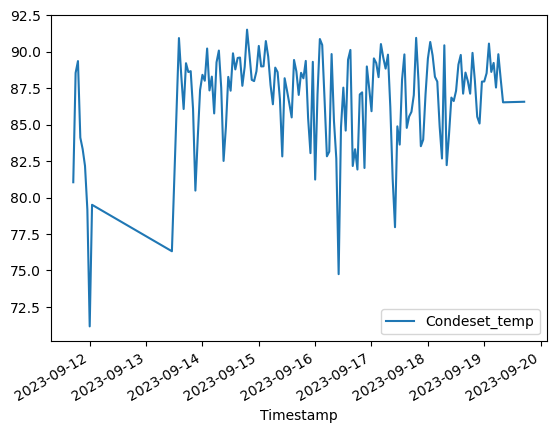

In [103]:
df3[["Condeset_temp"]][-650:-500].plot()

<Axes: xlabel='Timestamp'>

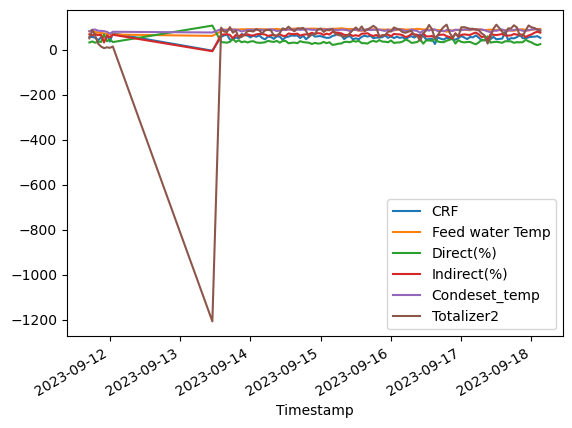

In [104]:
df3[[ 'CRF','Feed water Temp','Direct(%)','Indirect(%)',"Condeset_temp",'Totalizer2']][-650:-530].plot()

In [144]:
sel_col = ['Totalizer1','Condeset_temp','CRF','Feed water Temp','PPPPU 1 Motive Pressure',
       'PPPPU 1 Condensate Pressure', 'PPPPU 1 Overflow Temperature',
       'FJP Motive Steam Pressure', 'FJP Condensate Pressure',
       'FJP Flash Steam pressure', 'FJP Over Flow Temperature',
       ]

In [145]:
data_lessThan50=df3[df3['CRF'] <= 50]

In [146]:
data_greaterthan50=df3[df3['CRF']>50]

In [147]:
corr_lessthan50=data_lessThan50.corr()

In [148]:
corr_greaterthan50=data_greaterthan50.corr()

In [149]:
CRF_corr=corr_lessthan50['CRF'][sel_col]

In [150]:
CRF_corrg50=corr_greaterthan50['CRF'][sel_col]

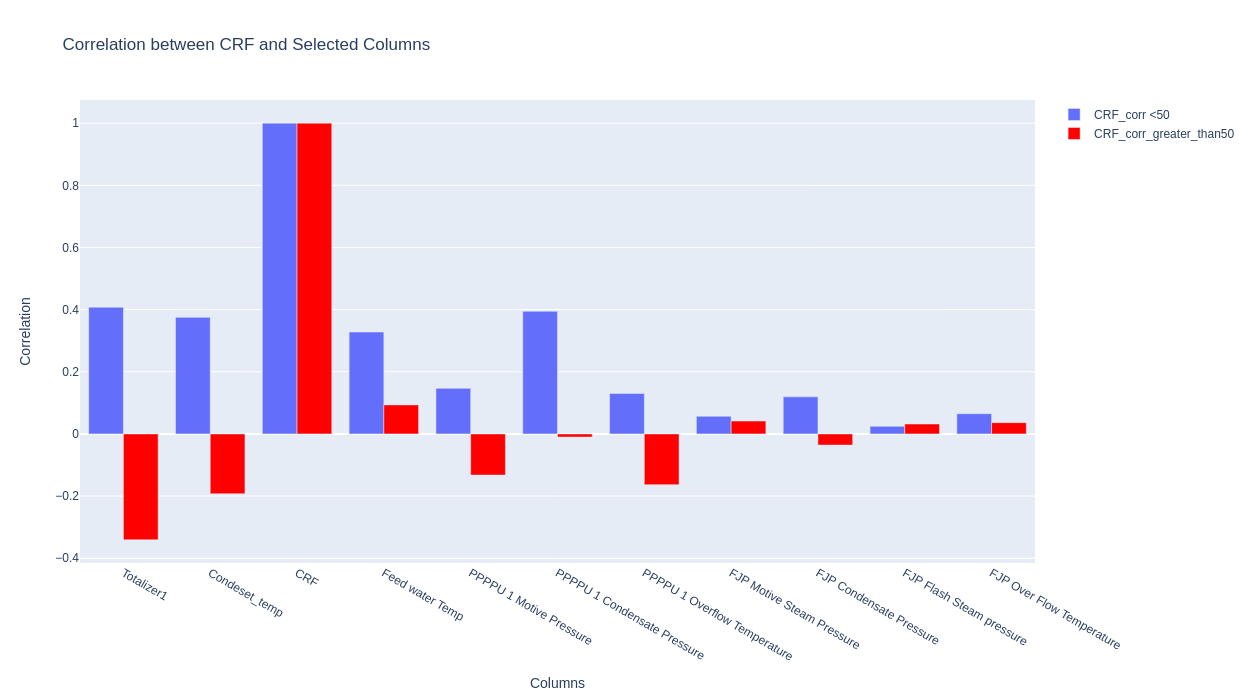

In [151]:
import plotly.graph_objects as go

fig = go.Figure()

# Add the first set of bars for CRF_corr
fig.add_trace(go.Bar(x=sel_col, y=CRF_corr, name='CRF_corr <50'))

# Add the second set of bars for CRF_corrg50 (colored in red)
fig.add_trace(go.Bar(x=sel_col, y=CRF_corrg50, name='CRF_corr_greater_than50', marker_color='red'))

# Update layout
fig.update_layout(
    title='Correlation between CRF and Selected Columns',
    xaxis_title='Columns',
    yaxis_title='Correlation',
    barmode='group',
    width=1000, 
    height=700
)

fig.show()

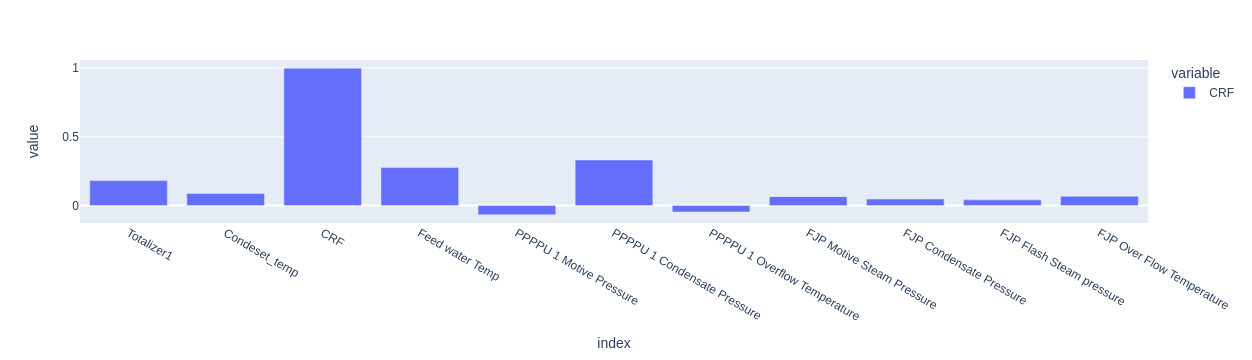

In [152]:
px.bar(df3.corr()['CRF'][sel_col])


In [153]:
results=[]
for col,value in data_lessThan50[sel_col].items():
    col_stats = [col]
    col_stats.extend(np.quantile(value, [0,0.25, 0.5, 0.75,1]))
    results.append(col_stats)
result_df = pd.DataFrame(results, columns=['Column','min','Q1', 'Median', 'Q3','max'])
result_df

,Column,min,Q1,Median,Q3,max
0,Totalizer1,-2.257914e+06,6238.875000,7777.025000,8839.790000,11188.240000
1,Condeset_temp,3.308029e+01,83.505016,86.654545,88.681005,92.696869
2,CRF,-4.578856e+00,42.106800,45.572218,47.846559,49.992741
3,Feed water Temp,6.122046e+01,84.779789,87.574482,89.909269,97.469582
4,PPPPU 1 Motive Pressure,1.300000e-01,3.410000,3.636667,3.750417,4.613333
5,PPPPU 1 Condensate Pressure,6.650000e-01,0.785000,0.809167,0.825000,1.100000
6,PPPPU 1 Overflow Temperature,2.916167e+01,73.780767,84.326664,91.648727,98.980003
7,FJP Motive Steam Pressure,0.000000e+00,3.165000,3.283333,3.391667,1600.000000
8,FJP Condensate Pressure,1.933333e-01,0.416667,0.485000,0.622500,1700.000000
9,FJP Flash Steam pressure,0.000000e+00,0.000000,0.000000,0.000000,1600.000000


In [154]:
results=[]
for col,value in data_greaterthan50[sel_col].items():
    col_stats = [col]
    col_stats.extend(np.quantile(value, [0,0.25, 0.5, 0.75,1]))
    results.append(col_stats)
result_df = pd.DataFrame(results, columns=['Column','min','Q1', 'Median', 'Q3','max'])
result_df

,Column,min,Q1,Median,Q3,max
0,Totalizer1,10.940000,6645.360000,8090.240000,9144.195000,11997.270000
1,Condeset_temp,54.854424,84.867897,87.497681,89.099277,93.017128
2,CRF,50.032276,53.295944,56.856964,61.611576,91.795319
3,Feed water Temp,67.212502,86.769585,89.067497,91.105583,98.513542
4,PPPPU 1 Motive Pressure,0.540000,3.246667,3.548333,3.718333,4.311666
5,PPPPU 1 Condensate Pressure,0.610000,0.813333,0.830000,0.848333,0.930000
6,PPPPU 1 Overflow Temperature,33.338333,74.265003,82.801666,89.749168,147.800003
7,FJP Motive Steam Pressure,0.100000,3.106667,3.256667,3.386667,1600.000000
8,FJP Condensate Pressure,0.000000,0.450000,0.526667,0.737500,1700.000000
9,FJP Flash Steam pressure,0.000000,0.000000,0.000000,0.000000,1600.000000


In [155]:
df3

,Totalizer1,Direct Steam,Indirect Steam,Condensate Total,Direct(%),Indirect(%),Gap In Indirect Vs CRF,CRF,Pump1 Total,Pump2 Total,...,FJP Over Flow Temperature,HRU INLET Temperature,HRU OUTLET Temperature,PRS Inlet Pressure,Steam Header Pressure,Gap,Flash Motive Pressure,Flash Steam Pressure,Condeset_temp,Totalizer2
Timestamp,,,,,,,,,,,,,,,,,,,,,
2023-01-02 09:00:00.000,35.00,NaN,NaN,330.0,NaN,NaN,NaN,NaN,300.0,0.0,...,1600.000000,65.660004,91.449997,1600.000000,1600.000000,NaN,NaN,NaN,NaN,0.3500
2023-01-02 10:00:00.000,815.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,...,1600.000000,70.860001,97.019997,1600.000000,1600.000000,NaN,NaN,NaN,NaN,8.1500
2023-01-02 20:00:00.000,455.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.0,...,1600.000000,83.610001,117.160004,1600.000000,1600.000000,NaN,NaN,NaN,NaN,4.5500
2023-01-02 21:00:00.000,620.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270.0,...,1600.000000,80.480003,117.449997,1600.000000,1600.000000,NaN,NaN,NaN,NaN,6.2000
2023-01-02 22:00:00.000,677.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,780.0,570.0,...,1600.000000,78.120003,116.599998,1600.000000,1600.000000,NaN,NaN,NaN,NaN,6.7700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-19 05:00:59.328,5844.64,2643.0,3201.64,2428.0,45.220920,54.779080,NaN,41.542336,1170.0,780.0,...,44.599998,74.330002,116.491669,12.600000,3.700000,13.236743,1700.0,0.0,84.474648,58.4464
2023-10-19 06:00:58.752,7821.14,2228.0,5593.14,4352.0,28.486896,71.513104,NaN,55.644062,2670.0,1470.0,...,49.211666,73.083336,116.264999,12.373333,3.580000,15.869042,1700.0,0.0,85.588890,78.2114
2023-10-19 07:00:59.040,6585.94,1787.0,4798.94,3608.0,27.133560,72.866440,NaN,54.783371,1890.0,1620.0,...,49.903332,71.831665,115.320000,12.350000,3.555000,18.083068,1700.0,0.0,85.685951,65.8594


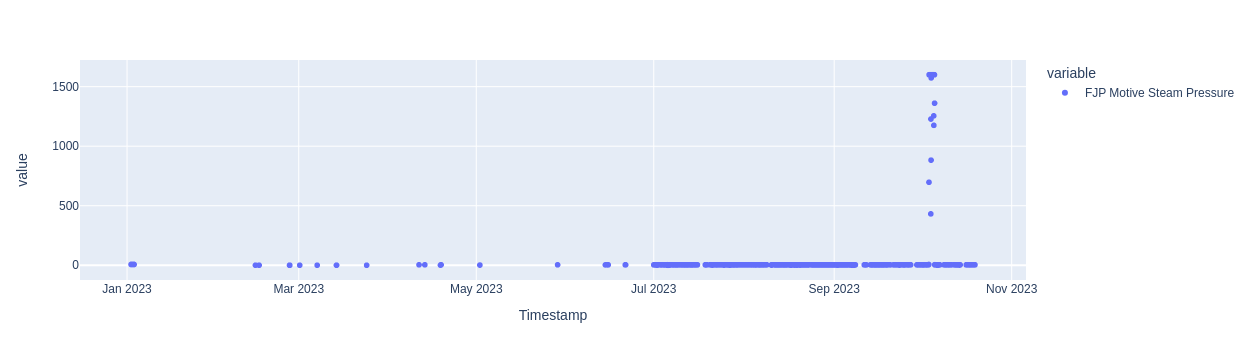

In [156]:
px.scatter(df3[['FJP Motive Steam Pressure']])

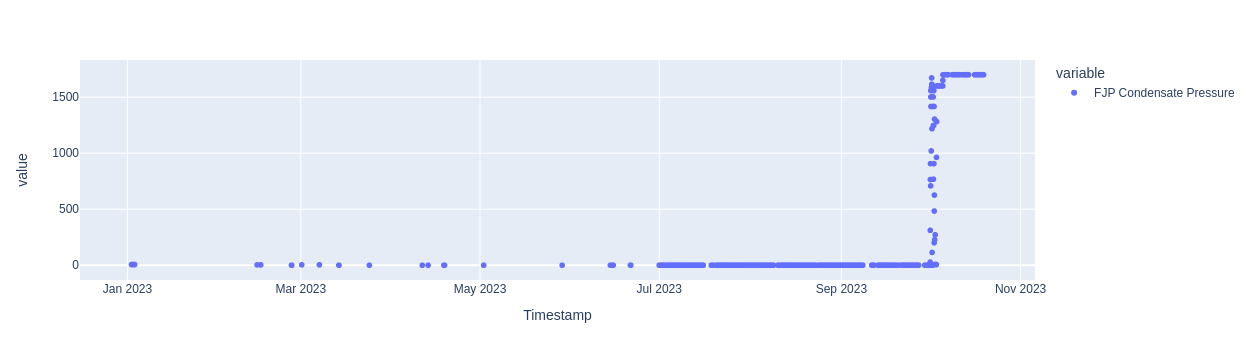

In [157]:
px.scatter(df3[[ 'FJP Condensate Pressure']])

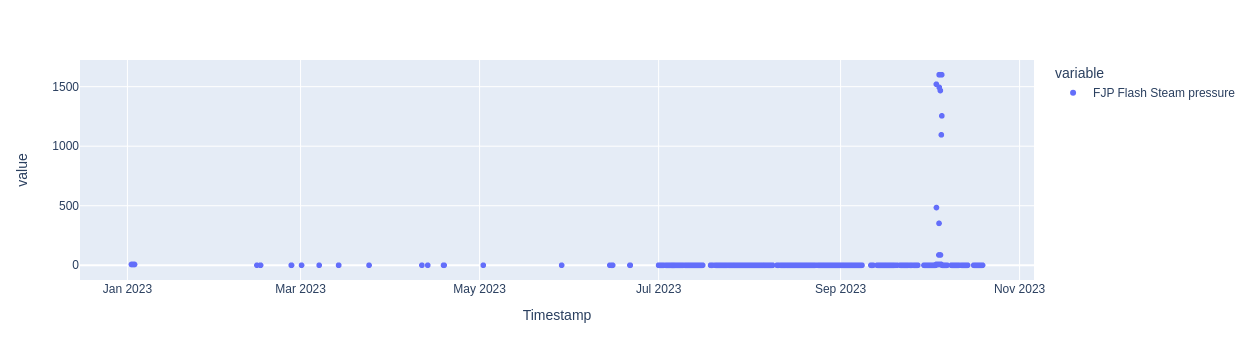

In [158]:
px.scatter(df3[['FJP Flash Steam pressure']])

In [159]:
len(df3[df3['FJP Motive Steam Pressure']>=100])

47

In [160]:
sel_col

['Totalizer1',
 'Condeset_temp',
 'CRF',
 'Feed water Temp',
 'PPPPU 1 Motive Pressure',
 'PPPPU 1 Condensate Pressure',
 'PPPPU 1 Overflow Temperature',
 'FJP Motive Steam Pressure',
 'FJP Condensate Pressure',
 'FJP Flash Steam pressure',
 'FJP Over Flow Temperature']

In [161]:
df4=df3[df3['FJP Motive Steam Pressure']<100]
df4=df4[df4['FJP Condensate Pressure']<100]
df4=df4[df4['FJP Flash Steam pressure']<100]


In [185]:
df4

,Totalizer1,Direct Steam,Indirect Steam,Condensate Total,Direct(%),Indirect(%),Gap In Indirect Vs CRF,CRF,Pump1 Total,Pump2 Total,...,FJP Over Flow Temperature,HRU INLET Temperature,HRU OUTLET Temperature,PRS Inlet Pressure,Steam Header Pressure,Gap,Flash Motive Pressure,Flash Steam Pressure,Condeset_temp,Totalizer2
Timestamp,,,,,,,,,,,,,,,,,,,,,
2023-01-02 09:00:00.000,35.00,NaN,NaN,330.0,NaN,NaN,NaN,NaN,300.0,0.0,...,1600.000000,65.660004,91.449997,1600.000000,1600.000000,NaN,NaN,NaN,NaN,0.3500
2023-01-02 10:00:00.000,815.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,...,1600.000000,70.860001,97.019997,1600.000000,1600.000000,NaN,NaN,NaN,NaN,8.1500
2023-01-02 20:00:00.000,455.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.0,...,1600.000000,83.610001,117.160004,1600.000000,1600.000000,NaN,NaN,NaN,NaN,4.5500
2023-01-02 21:00:00.000,620.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270.0,...,1600.000000,80.480003,117.449997,1600.000000,1600.000000,NaN,NaN,NaN,NaN,6.2000
2023-01-02 22:00:00.000,677.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,780.0,570.0,...,1600.000000,78.120003,116.599998,1600.000000,1600.000000,NaN,NaN,NaN,NaN,6.7700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-03 04:00:59.040,8349.42,2021.0,6328.42,4450.0,24.205274,75.794726,NaN,53.297115,2430.0,1530.0,...,57.608334,102.821663,112.143333,11.593333,3.501667,22.497611,6.468333,0.0,88.215721,83.4942
2023-10-03 05:00:59.328,7490.31,2463.0,5027.31,5350.0,32.882484,67.117516,NaN,71.425613,3090.0,1620.0,...,55.513332,102.663330,111.720001,11.700000,3.590000,-4.308099,6.376667,0.0,88.241776,74.9031
2023-10-03 06:00:58.752,9754.15,3521.0,6233.15,5330.0,36.097456,63.902544,NaN,54.643410,2970.0,1770.0,...,57.618332,102.768333,114.845001,11.683333,3.368333,9.259136,6.225000,0.0,88.794937,97.5415


In [162]:
data_lessThan50_=df4[df4['CRF'] <= 50]

In [163]:
data_greaterthan50_=df4[df4['CRF']>50]

In [164]:
corr_lessthan50_=data_lessThan50_.corr()

In [165]:
corr_greaterthan50_=data_greaterthan50_.corr()

In [166]:
CRF_corr1=corr_lessthan50_['CRF'][sel_col]

In [167]:
CRF_corrg50_1=corr_greaterthan50_['CRF'][sel_col]

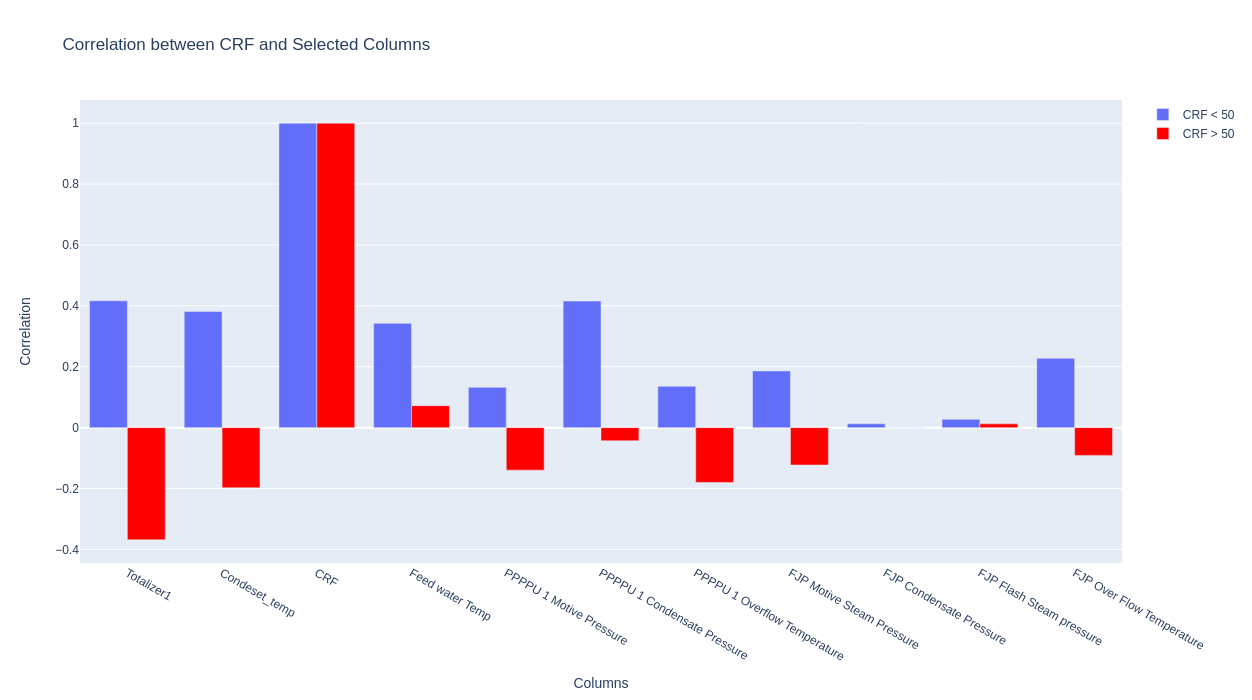

In [168]:
import plotly.graph_objects as go

fig = go.Figure()

# Add the first set of bars for CRF_corr
fig.add_trace(go.Bar(x=sel_col, y=CRF_corr1, name='CRF < 50'))

# Add the second set of bars for CRF_corrg50 (colored in red)
fig.add_trace(go.Bar(x=sel_col, y=CRF_corrg50_1, name='CRF > 50', marker_color='red'))

# Update layout
fig.update_layout(
    title='Correlation between CRF and Selected Columns',
    xaxis_title='Columns',
    yaxis_title='Correlation',
    barmode='group',
    width=1000, 
    height=700
)

fig.show()

In [169]:
results=[]
for col,value in data_lessThan50_[sel_col].items():
    col_stats = [col]
    col_stats.extend(np.quantile(value, [0,0.25, 0.5, 0.75,1]))
    results.append(col_stats)
result_df = pd.DataFrame(results, columns=['Column','min','Q1', 'Median', 'Q3','max'])
result_df

,Column,min,Q1,Median,Q3,max
0,Totalizer1,-2.257914e+06,6260.350000,7818.970000,8903.560000,11188.240000
1,Condeset_temp,3.308029e+01,83.205963,86.532516,88.539642,92.555099
2,CRF,-4.578856e+00,41.622334,45.261513,47.716026,49.992741
3,Feed water Temp,6.122046e+01,85.004997,87.677086,90.137711,97.469582
4,PPPPU 1 Motive Pressure,1.300000e-01,3.365000,3.591667,3.736667,4.613333
5,PPPPU 1 Condensate Pressure,6.650000e-01,0.785000,0.810000,0.825000,1.100000
6,PPPPU 1 Overflow Temperature,2.916167e+01,74.036667,84.370003,91.989998,98.980003
7,FJP Motive Steam Pressure,0.000000e+00,3.141667,3.265000,3.376667,3.773333
8,FJP Condensate Pressure,1.933333e-01,0.406667,0.468333,0.558333,6.453333
9,FJP Flash Steam pressure,0.000000e+00,0.000000,0.000000,0.000000,0.100000


In [170]:
results=[]
for col,value in data_greaterthan50_[sel_col].items():
    col_stats = [col]
    col_stats.extend(np.quantile(value, [0,0.25, 0.5, 0.75,1]))
    results.append(col_stats)
result_df = pd.DataFrame(results, columns=['Column','min','Q1', 'Median', 'Q3','max'])
result_df

,Column,min,Q1,Median,Q3,max
0,Totalizer1,10.940000,6573.607500,8089.570000,9133.302500,11444.680000
1,Condeset_temp,54.854424,84.379951,87.294945,88.898001,92.692268
2,CRF,50.032276,53.295359,56.912519,61.727664,91.795319
3,Feed water Temp,67.212502,86.931252,89.272812,91.405630,98.513542
4,PPPPU 1 Motive Pressure,0.540000,3.205417,3.461667,3.695000,4.080000
5,PPPPU 1 Condensate Pressure,0.610000,0.815000,0.830000,0.848333,0.930000
6,PPPPU 1 Overflow Temperature,33.338333,74.457500,82.811665,89.837084,99.178337
7,FJP Motive Steam Pressure,0.100000,3.085417,3.226667,3.362917,3.778333
8,FJP Condensate Pressure,0.000000,0.436667,0.500000,0.600000,28.363333
9,FJP Flash Steam pressure,0.000000,0.000000,0.000000,0.000000,0.018333


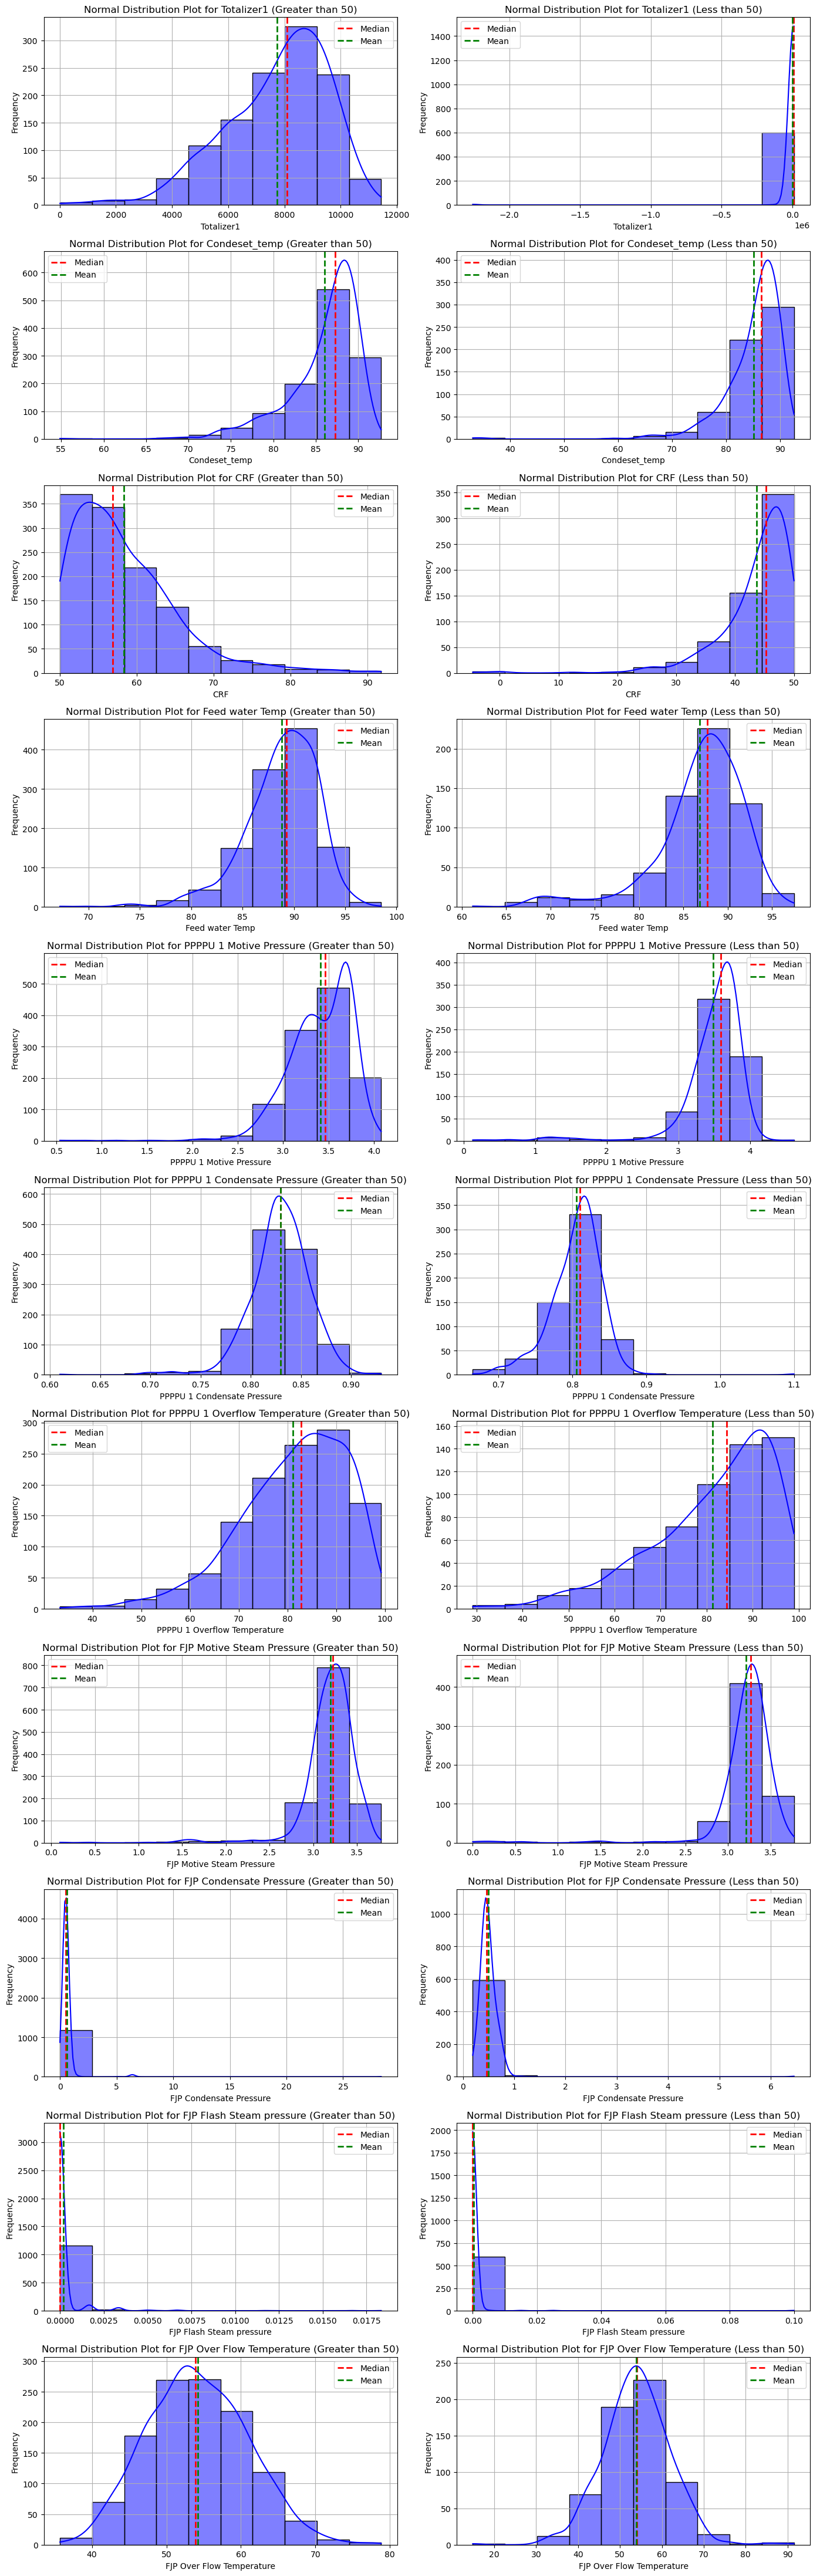

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

num_rows = len(sel_col)
fig, axes = plt.subplots(num_rows, 2, figsize=(14, 4 * num_rows))

for i, col in enumerate(sel_col):
    plt.subplot(num_rows, 2, i * 2 + 1)
    sns.histplot(data_greaterthan50_[col], kde=True, color='blue', bins=10)
    median_greater_than_50 = data_greaterthan50_[col].median()
    mean_greater_than_50 = data_greaterthan50_[col].mean()
    plt.axvline(median_greater_than_50, color='red', linestyle='dashed', linewidth=2, label='Median')
    plt.axvline(mean_greater_than_50, color='green', linestyle='dashed', linewidth=2, label='Mean')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Normal Distribution Plot for {col} (Greater than 50)')
    plt.grid()
    plt.legend()

for i, col in enumerate(sel_col):
    plt.subplot(num_rows, 2, i * 2 + 2)
    sns.histplot(data_lessThan50_[col], kde=True, color='blue', bins=10)
    median_less_than_50 = data_lessThan50_[col].median()
    mean_less_than_50 = data_lessThan50_[col].mean()
    plt.axvline(median_less_than_50, color='red', linestyle='dashed', linewidth=2, label='Median')
    plt.axvline(mean_less_than_50, color='green', linestyle='dashed', linewidth=2, label='Mean')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Normal Distribution Plot for {col} (Less than 50)')
    plt.grid()
    plt.legend()

plt.tight_layout()
plt.show()

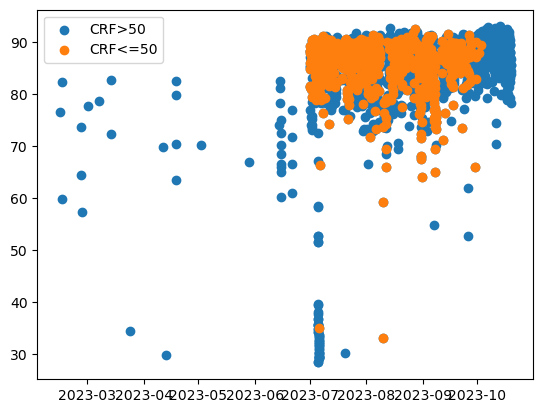

In [179]:
#data_lessThan50_['Condeset_temp'].plot(label="CRF<=50")
#data_greaterthan50_['Condeset_temp'].plot(label="CRF>50")
plt.scatter(df3.index,df3['Condeset_temp'],label="CRF>50")
plt.scatter(data_lessThan50_.index,data_lessThan50_['Condeset_temp'],label="CRF<=50")
plt.legend()
plt.show()

<Axes: xlabel='Timestamp'>

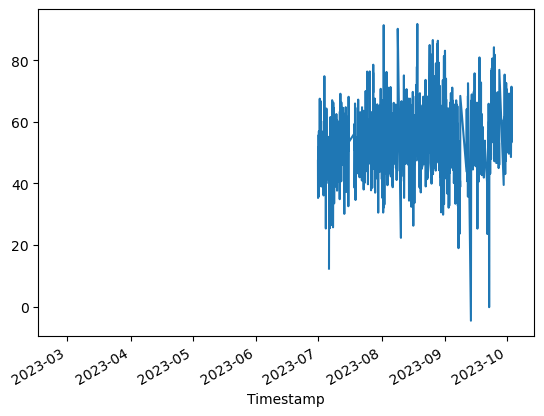

In [205]:
df4['CRF'].plot()

c=0
for i in df4['CRF']:
    if i>50:
        print(df4[df4['CRF']==i].index)
        c=c+1
print(c)

In [206]:
df4

,Totalizer1,Direct Steam,Indirect Steam,Condensate Total,Direct(%),Indirect(%),Gap In Indirect Vs CRF,CRF,Pump1 Total,Pump2 Total,...,FJP Over Flow Temperature,HRU INLET Temperature,HRU OUTLET Temperature,PRS Inlet Pressure,Steam Header Pressure,Gap,Flash Motive Pressure,Flash Steam Pressure,Condeset_temp,Totalizer2
Timestamp,,,,,,,,,,,,,,,,,,,,,
2023-01-02 09:00:00.000,35.00,NaN,NaN,330.0,NaN,NaN,NaN,NaN,300.0,0.0,...,1600.000000,65.660004,91.449997,1600.000000,1600.000000,NaN,NaN,NaN,NaN,0.3500
2023-01-02 10:00:00.000,815.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,...,1600.000000,70.860001,97.019997,1600.000000,1600.000000,NaN,NaN,NaN,NaN,8.1500
2023-01-02 20:00:00.000,455.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.0,...,1600.000000,83.610001,117.160004,1600.000000,1600.000000,NaN,NaN,NaN,NaN,4.5500
2023-01-02 21:00:00.000,620.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270.0,...,1600.000000,80.480003,117.449997,1600.000000,1600.000000,NaN,NaN,NaN,NaN,6.2000
2023-01-02 22:00:00.000,677.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,780.0,570.0,...,1600.000000,78.120003,116.599998,1600.000000,1600.000000,NaN,NaN,NaN,NaN,6.7700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-03 04:00:59.040,8349.42,2021.0,6328.42,4450.0,24.205274,75.794726,NaN,53.297115,2430.0,1530.0,...,57.608334,102.821663,112.143333,11.593333,3.501667,22.497611,6.468333,0.0,88.215721,83.4942
2023-10-03 05:00:59.328,7490.31,2463.0,5027.31,5350.0,32.882484,67.117516,NaN,71.425613,3090.0,1620.0,...,55.513332,102.663330,111.720001,11.700000,3.590000,-4.308099,6.376667,0.0,88.241776,74.9031
2023-10-03 06:00:58.752,9754.15,3521.0,6233.15,5330.0,36.097456,63.902544,NaN,54.643410,2970.0,1770.0,...,57.618332,102.768333,114.845001,11.683333,3.368333,9.259136,6.225000,0.0,88.794937,97.5415


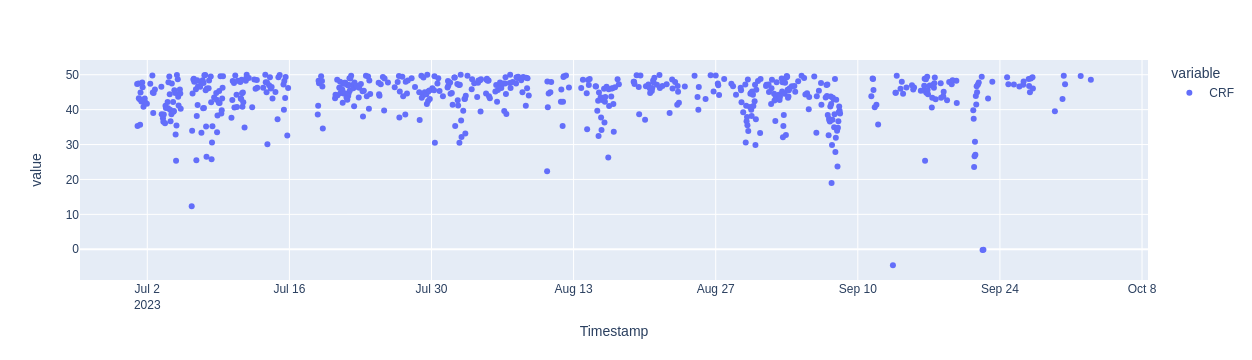

In [199]:
px.scatter(df4[df4['CRF'] <= 50]['CRF'])

In [184]:
data_lessThan50_.index

DatetimeIndex(['2023-07-01 00:00:58.752000', '2023-07-01 01:00:59.040000',
               '2023-07-01 03:00:58.752000', '2023-07-01 04:00:59.040000',
               '2023-07-01 06:00:58.752000', '2023-07-01 07:00:59.040000',
               '2023-07-01 08:00:59.328000', '2023-07-01 10:00:59.040000',
               '2023-07-01 12:00:58.752000', '2023-07-01 13:00:59.040000',
               ...
               '2023-09-26 23:00:59.328000', '2023-09-27 01:00:59.040000',
               '2023-09-27 05:00:59.328000', '2023-09-27 06:00:58.752000',
               '2023-09-29 10:00:59.040000', '2023-09-30 04:00:59.040000',
               '2023-09-30 07:00:59.040000', '2023-09-30 10:00:59.040000',
               '2023-10-01 23:00:59.328000', '2023-10-02 23:00:59.328000'],
              dtype='datetime64[ns]', name='Timestamp', length=601, freq=None)

In [182]:
data_greaterthan50_

,Totalizer1,Direct Steam,Indirect Steam,Condensate Total,Direct(%),Indirect(%),Gap In Indirect Vs CRF,CRF,Pump1 Total,Pump2 Total,...,FJP Over Flow Temperature,HRU INLET Temperature,HRU OUTLET Temperature,PRS Inlet Pressure,Steam Header Pressure,Gap,Flash Motive Pressure,Flash Steam Pressure,Condeset_temp,Totalizer2
Timestamp,,,,,,,,,,,,,,,,,,,,,
2023-02-25 20:00:00.000,37.00,NaN,NaN,30.0,NaN,NaN,NaN,81.000000,0.0,0.0,...,41.509998,80.489998,126.919998,0.160000,0.200000,NaN,NaN,NaN,73.750000,0.3700
2023-03-13 23:00:00.000,625.00,NaN,NaN,470.0,NaN,NaN,NaN,75.000000,270.0,30.0,...,40.590000,80.180000,113.800003,1.910000,1.100000,NaN,NaN,NaN,82.750000,6.2500
2023-06-14 09:00:00.000,654.00,336.0,318.00,520.0,51.000000,49.000000,-31.0,80.000000,300.0,90.0,...,50.090000,76.720001,125.790001,11.990000,1.200000,NaN,NaN,NaN,74.000000,6.5400
2023-07-01 02:00:59.328,8020.96,2543.0,5477.96,4150.0,31.704434,68.295566,NaN,51.739441,2940.0,1110.0,...,61.096668,80.584999,108.033333,12.300000,3.600000,NaN,0.420000,0.0,85.212082,80.2096
2023-07-01 05:00:59.328,8047.04,2181.0,5866.04,4100.0,27.103134,72.896866,NaN,50.950413,3210.0,840.0,...,51.988335,80.711670,111.933334,12.298333,3.643333,NaN,0.541667,0.0,87.094055,80.4704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-03 04:00:59.040,8349.42,2021.0,6328.42,4450.0,24.205274,75.794726,NaN,53.297115,2430.0,1530.0,...,57.608334,102.821663,112.143333,11.593333,3.501667,22.497611,6.468333,0.0,88.215721,83.4942
2023-10-03 05:00:59.328,7490.31,2463.0,5027.31,5350.0,32.882484,67.117516,NaN,71.425613,3090.0,1620.0,...,55.513332,102.663330,111.720001,11.700000,3.590000,-4.308099,6.376667,0.0,88.241776,74.9031
2023-10-03 06:00:58.752,9754.15,3521.0,6233.15,5330.0,36.097456,63.902544,NaN,54.643410,2970.0,1770.0,...,57.618332,102.768333,114.845001,11.683333,3.368333,9.259136,6.225000,0.0,88.794937,97.5415
